# Dunning-Kreuger plot deconstruction 
from y-combinator web site (reddit) 

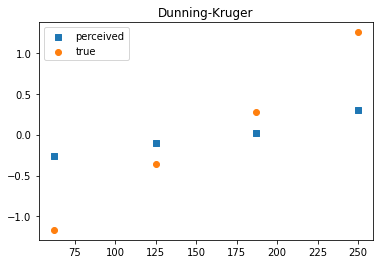

In [180]:
  import random
  import numpy as np

  np.random.seed(seed=12345)

  from scipy.linalg import eigh, cholesky
  from scipy.stats import norm
  from matplotlib import pyplot as plt

  #Draw correlated random variables
  #Ref here: https://scipy-cookbook.readthedocs.io/items/CorrelatedRandomSamples.html

  num_samples = 125 * 4                 #
  x = norm.rvs(size=(2, num_samples)) # uncorrelated random normal variables

  expected_correlation = np.array([[1.0, 0.19], [0.19, 1.0]])
  c = cholesky(expected_correlation, lower=True) #there's a slight correlation of R = 0.19 between actual and perceived scores (according to Ackerman, 2002)

  trans_x = np.dot(c, x)

  #perceived / actual readings with R=0.19
  perceived = trans_x[0, :]
  actual = trans_x[1, :]

  #Sort both variables by actual scores.
  sort_by_actual = sorted(range(num_samples), key = lambda idx: actual[idx])

  perceived_by_actual = [perceived[i] for i in sort_by_actual]
  actual_by_actual = [actual[i] for i in sort_by_actual]

  quartile_indices = [i * (num_samples // 4) for i in range(5)] #note: depends on divisiblity by four

  x_coords = [xx // 2 for xx in quartile_indices[1:]] #mid-points just for plotting
  perceived_means = [np.mean(perceived_by_actual[start:end]) for (start, end) in zip(quartile_indices[:-1], quartile_indices[1:])]
  actual_means = [np.mean(actual_by_actual[start:end]) for (start, end) in zip(quartile_indices[:-1], quartile_indices[1:])]

  #Plot
  fig = plt.figure()

  ax1 = fig.add_subplot(111)
  plt.title("Dunning-Kruger")

  ax1.scatter(x_coords, perceived_means, marker="s", label="perceived")
  ax1.scatter(x_coords, actual_means, marker="o", label="true")
  ax1.legend()

  plt.show()